**<font size=6>保险赔偿预测</font>**

<img src="images/1.png" alt="FAO" width="590" >


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

# import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('train_shape: ', train.shape)
print('test_shape: ', test.shape)

train_shape:  (188318, 132)
test_shape:  (125546, 131)


In [4]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### check columns

In [5]:
column = train.columns
print('First 20 columns: ',column[:20])
print('Last 20 columns: ',column[-20:])
column

First 20 columns:  Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cat19'],
      dtype='object')
Last 20 columns:  Index(['cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cont1', 'cont2',
       'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10',
       'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')


Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

⬆️1 id , 116 category and 14 continuous, and 1 loss  
but we don't know what they are.  


another way to see the division to categories and continuous features

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


⬆️here, float is for continuous;  int and object are categories(discrete features)

how to use format? https://www.runoob.com/python/att-string-format.html

In [7]:
cat_features = list(train.select_dtypes(include=['object']).columns)
print('Categories: {} features'.format(len(cat_features)))
      
con_features = list(train.select_dtypes(include=['float64']).columns)
print('Continuous: {} features'.format(len(con_features)))

id_col = list(train.select_dtypes(include=['int64']).columns)
print('ID: {}'.format(id_col))
      
      

Categories: 116 features
Continuous: 15 features
ID: ['id']


### check whether the data has been proprocessed

In [8]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [9]:
train.isnull().any().sum()

0

no missing values, mean, std, min, and max are similar  
continuous are varied from 0 to 1

### check the categories unique values

In [10]:
result = train[cat_features].apply(pd.value_counts)
result

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
A,141550.0,106721.0,177993.0,128395.0,123737.0,131693.0,183744.0,177274.0,113122.0,160213.0,168186.0,159825.0,168851.0,186041.0,188284.0,181843.0,187009.0,187331.0,186510.0,188114.0,187905.0,188275.0,157445.0,181977.0,169969.0,177119.0,168250.0,180938.0,184593.0,184760.0,182980.0,187107.0,187361.0,187734.0,188105.0,156313.0,165729.0,169323.0,183393.0,180119.0,181177.0,186623.0,184110.0,172716.0,183991.0,187436.0,187617.0,188049.0,179127.0,137611.0,187071.0,179505.0,172949.0,183762.0,188173.0,188136.0,185296.0,188079.0,188018.0,187872.0,187596.0,188273.0,188239.0,188271.0,186056.0,179982.0,187626.0,188176.0,188011.0,188295.0,178646.0,118322.0,154275.0,184731.0,154307.0,181347.0,49.0,788.0,7064.0,783.0,788.0,19322.0,26038.0,29450.0,788.0,1589.0,788.0,168926.0,183744.0,177993.0,111028.0,124689.0,432.0,738.0,3736.0,35.0,41970.0,105492.0,NaN,9402.0,106721.0,177274.0,123737.0,68.0,77.0,75.0,75.0,9299.0,52.0,1296.0,128395.0,2411.0,3269.0,131693.0,75.0,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,1241.0,NaN,NaN,NaN,4.0
AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21933.0,56.0,NaN,246.0,18.0,NaN,NaN,2.0
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611.0,NaN,454.0,1.0,NaN,NaN,85.0
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626.0,NaN,1531.0,4419.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [11]:
train['cat1'].unique()

array(['A', 'B'], dtype=object)

In [12]:

cat_uniques = []
for i in cat_features:
    cat_uniques.append(len(train[i].unique()))


In [13]:
cat_uniques = pd.DataFrame(cat_uniques)
cat_features = pd.DataFrame(cat_features)
uniq_values_cat= pd.concat([cat_features,cat_uniques],axis=1)
uniq_values_cat.columns = ['cat_featues','number of unique values']
uniq_values_cat

,cat_featues,number of unique values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
5,cat6,2
6,cat7,2
7,cat8,2
8,cat9,2
9,cat10,2


In [14]:
uniq_values_cat.describe()

,number of unique values
count,116.000000
mean,9.818966
std,33.666807
min,2.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,326.000000


In [15]:
uniq_values_cat['number of unique values'][uniq_values_cat
                ['number of unique values'] == 2].count()



72

In [16]:
uniq_values_cat['number of unique values'][uniq_values_cat
                ['number of unique values'] == 326].count()



1

Text(326, 20, '326 features')

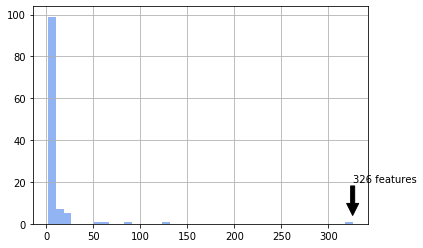

In [17]:
#fig, (ax1, ax2) = plt.subplots(1,2)
ax1 = plt.hist(uniq_values_cat['number of unique values'],bins=40, 
               facecolor="cornflowerblue", alpha=0.7)
plt.grid()
plt.annotate('326 features', xy=(326,4), xytext=(326,20),arrowprops=dict(facecolor='Black'))


### the loss

(array([1.23585e+05, 4.33920e+04, 1.34500e+04, 4.72300e+03, 1.80000e+03,
        7.07000e+02, 3.20000e+02, 1.58000e+02, 8.70000e+01, 3.60000e+01,
        1.90000e+01, 1.00000e+01, 7.00000e+00, 5.00000e+00, 5.00000e+00,
        1.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([6.70000000e-01, 3.02595950e+03, 6.05124900e+03, 9.07653850e+03,
        1.21018280e+04, 1.51271175e+04, 1.81524070e+04, 2.11776965e+04,
        2.42029860e+04, 2.72282755e+04, 3.02535650e+04, 3.32788545e+04,
        3.63041440e+04, 3.93294335e+04, 4.23547230e+04, 4.53800125e+04,
        4.84053020e+04, 5.14305915e+04, 5.44558810e+04, 5.74811705e+04,
        6.05064600e+04, 6.35317495e+04, 6.65570390e+04

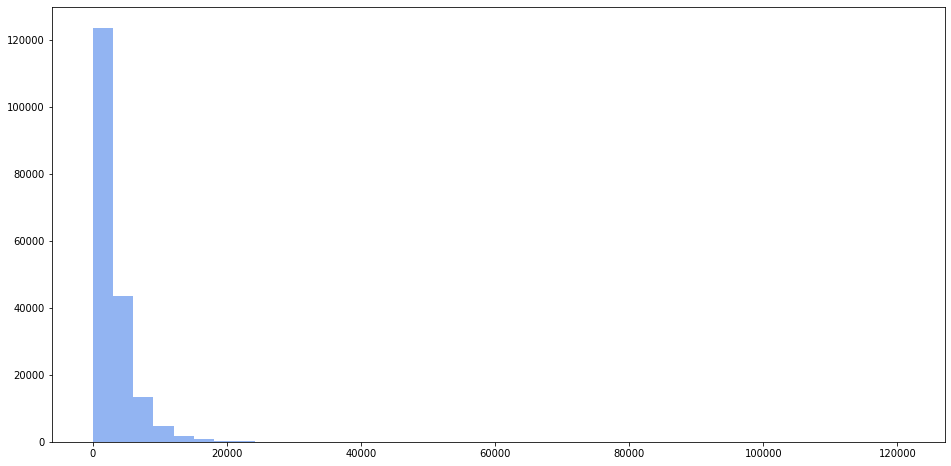

In [18]:
plt.figure(figsize=(16,8))
plt.hist(train['loss'],bins=40, 
               facecolor="cornflowerblue", alpha=0.7)

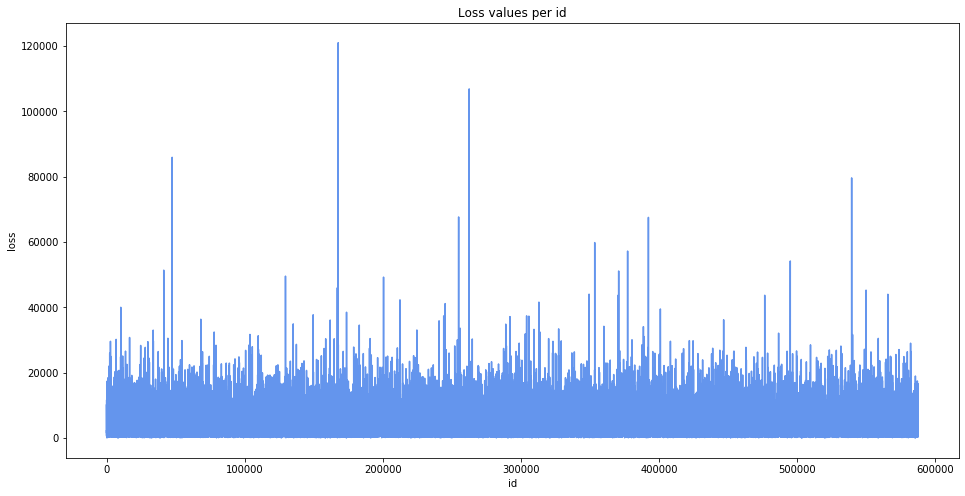

In [19]:
plt.figure(figsize=(16,8))
plt.plot(train['id'], train['loss'],c='cornflowerblue')
plt.title('Loss values per id')
plt.xlabel('id')
plt.ylabel('loss')
plt.show()


the distribution of loss is not very good for our model  
so let's see what is the skew of this distribution
https://zhuanlan.zhihu.com/p/53184516  
in general, when absolute of skew is larger than 1, then it's not very beneficial for the modeling

In [20]:
stats.mstats.skew(train['loss']).data

array(3.79492815)

In [21]:
stats.mstats.kurtosis(train['loss'])

48.07825942144164

there is a skew of the loss, and the kurtosis is very large, how to deal with it?  
log is a good way to improve the data

In [22]:
stats.mstats.skew(np.log(train['loss'])).data 

array(0.0929738)

In [23]:
stats.mstats.kurtosis(np.log(train['loss']))

-0.11456955157443094

⬆️much better!

more clear in plots:

Text(0.5, 1.0, 'The log loss histogram')

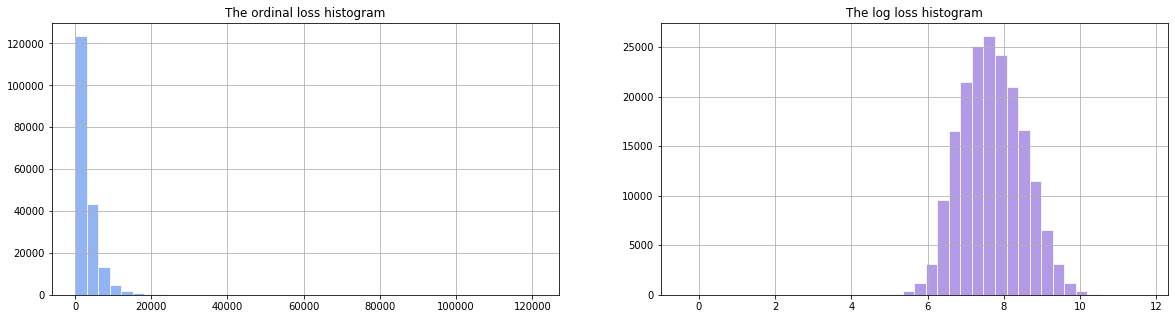

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,5)
ax1.hist(train['loss'],bins=40, 
               facecolor="cornflowerblue", alpha=0.7,edgecolor="white")
ax1.grid()
ax1.set_title('The ordinal loss histogram')

ax2.hist(np.log(train['loss']),bins=40,
         facecolor='mediumpurple',alpha=0.7,edgecolor="white")
ax2.grid()
ax2.set_title('The log loss histogram')


so remember to have a log to the loss

### check the contiuous distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ee5390>,
      dtype=object)

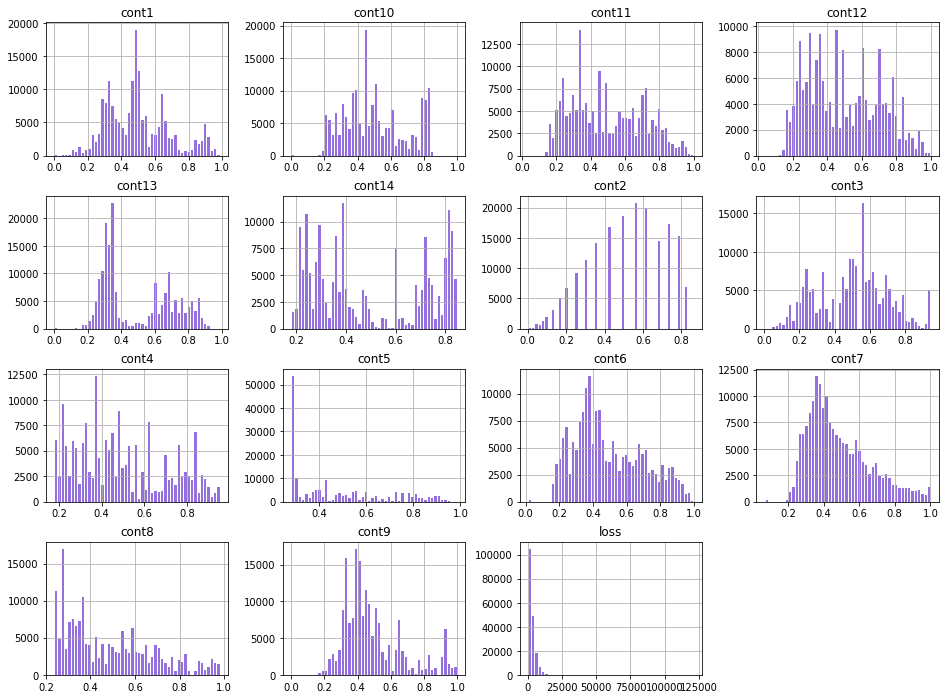

In [25]:
train[con_features].hist(bins=50, 
                         figsize=(16,12),
                        facecolor='mediumpurple',
                        edgecolor = 'white')

### check the correlation

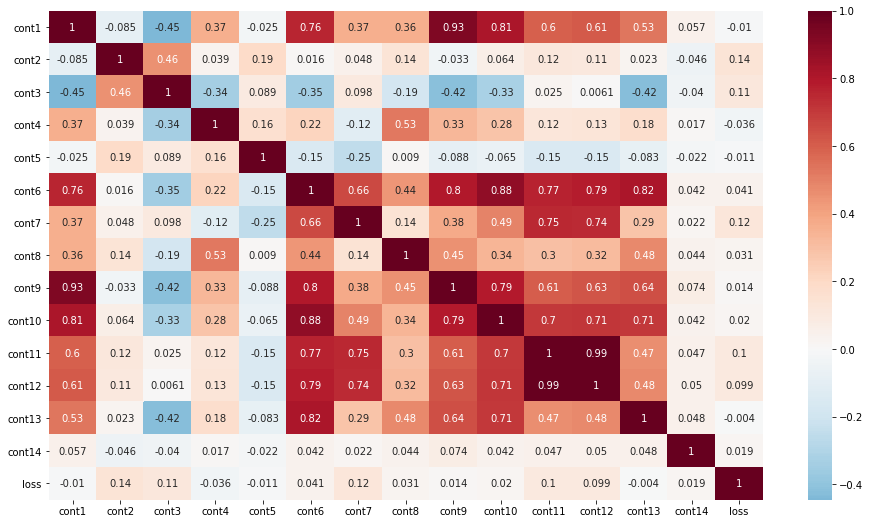

In [26]:
plt.subplots(figsize=(16,9))
correlation_mat = train[con_features].corr()
sns.heatmap(correlation_mat, annot=True,
            cmap='RdBu_r',center=0)
            

[MLENS] backend: threading


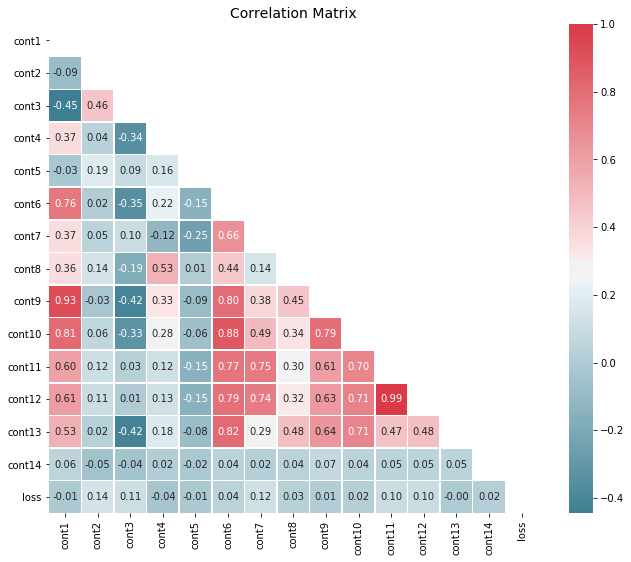

In [27]:
from mlens.visualization import corrmat

corrmat(train[con_features].corr(), inflate=False)
plt.show()

some features are collinearity

# XGbosst

In [28]:
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## preprocessing

In [29]:
train['log_loss'] = np.log(train['loss'])

In [30]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,7.702186
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,7.157424
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,8.008063
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,6.845720
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,7.924380


### seperate features

In [31]:
train.select_dtypes('float64')

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,7.702186
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,7.157424
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,8.008063
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,6.845720
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,7.924380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62,7.088926
188314,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34,7.010619
188315,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64,8.659151
188316,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87,7.354279


In [32]:
features = [x for x in train.columns 
            if x not in ['id','loss','log_loss']]
cat_features = [x for x in 
                train.select_dtypes('object').columns
               if x not in ['id','loss','log_loss']]
num_features = [x for x in train.select_dtypes('float64').columns
               if x not in ['id','loss','log_loss']]
print ("Categorical has {} features:".format(len(cat_features)))
print ("Numerical has {} features:".format(len(num_features)))

Categorical has 116 features:
Numerical has 14 features:


### label encoder

Use a label encoder for categorical features:

In [33]:
ntrain = train.shape[0]

train_x = train[features]
train_y = train['log_loss']

from sklearn import LabelEncoder
train_x[cat_features]=train_x[cat_features].apply(LabelEncoder().fit_transform)

train_x


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,1,2,1,3,1,1,2,1,1,1,0,0,0,0,0,3,3,3,4,4,0,12,8,3,0,0,3,4,9,6,1,33,106,0,32,38,0,11,55,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,0,2,1,1,1,0,0,0,0,0,3,3,3,4,2,0,12,10,0,0,0,4,4,7,5,1,33,44,0,22,20,4,9,75,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Simple XGboost Model

### DMatrix

xgboost will transfer the dataframe to DMatrix which makes it much efficient for xgboost to fit and predict.   
[just like what we did before to transfer the dataframe to the numpy array]

In [34]:
dtrain = xgb.DMatrix(train_x, train['log_loss'])
dtrain

### define the evaluation function

now it's time to decide the evaluation for the model. we choose MAE.   
However, the MAE is very small that the difference between different hyperparameters is not very clear. So we decide to use exp to let the MAE larger.  

**i.e mean_absolute_error(np.exp(y),np.exp(yhat))**

In [35]:
# make a function of our assessment
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label() #get the label(y) of dmatrix
    return 'mae', mean_absolute_error(np.exp(y),np.exp(yhat))
#attention the return, if not like that, will get error from the xgb.cv

### Xgboost hyperparameter
http://www.huaxiaozhuan.com/%E5%B7%A5%E5%85%B7/xgboost/chapters/xgboost_usage.html

- 'booster':'gbtree', 基本不用调，就是用了什么样的方法来做模型的，这里gbtree就是决策树
- 'objective': 指定任务类型（问的要用的损失函数） -- 'multi:softmax', 多分类的问题，还需要指定分出多少个类别
  - about softmax:     https://blog.csdn.net/bitcarmanlee/article/details/82320853  

- 'num_class':10, 类别数，与 multisoftmax 并用
- 'gamma':损失下降多少才进行分裂  
  - 也称作最小划分损失min_split_loss。 它刻画的是：对于一个叶子节点，当对它采取划分之后，损失函数的降低值的阈值。
      - 如果大于该阈值，则该叶子节点值得继续划分
      - 如果小于该阈值，则该叶子节点不值得继续划分
  - 该值越大，则算法越保守（尽可能的少划分）。
  - 默认值为 0

- 'max_depth':12, 构建树的深度，越大越容易过拟合
- 'lambda':2,  控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。ie 正则化的惩罚力度
    - lambda： L2 正则化系数（基于weights的正则化），默认为 1。 该值越大则模型越简单
- 'subsample':0.7, 随机采样训练样本
- 'colsample_bytree':0.7, 生成树时进行的列采样 ie 特征采样
- 'min_child_weight':3, 叶子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
    - 所谓的权重：
      - 对于线性模型(booster=gblinear)，权重就是：叶子节点包含的样本数量。 因此该参数就是每个节点包含的最少样本数量。
      - 对于树模型（booster=gbtree,dart），权重就是：叶子节点包含样本的所有二阶偏导数之和。  
      
- 'silent':0 ,设置成1则没有运行信息输出，最好是设置为0.
- 'eta': 0.007, 如同学习率。默认为 0.3 。范围为 [0,1]
  - 梯度下降里，学习率是一次更新的大小
  - XGboost是串行进来的，eg 当第新的树进来的时候，取它百分之多少的贡献
- 'seed':1000,
- 'nthread':7, cpu 线程数

In [36]:
xgb_params = {
    'seed': 0,
    'eta': 0.1,
    'colsample_bytree': 0.5,
    'silent': 1,
    'subsample': 0.5,
    'objective': 'reg:linear',
    'max_depth': 5,
    'min_child_weight': 3
}

### cross validation

xgboost has its own cross validation: xgb.cv

hyperparameter：
http://www.huaxiaozhuan.com/%E5%B7%A5%E5%85%B7/xgboost/chapters/xgboost_usage.html

- params： 一个列表（元素为键值对）、一个字典，表示训练的参数

- dtrain：一个DMatrix 对象，表示训练集

- num_boost_round： 一个整数，表示boosting 迭代数量   i.e. 树的个数

- nfold： 一个整数，表示交叉验证的fold 的数量

- stratified： 一个布尔值。如果为True，则执行分层采样

- folds： 一个scikit-learn 的 KFold 实例或者StratifiedKFold 实例。

- metrics：一个字符串或者一个字符串的列表，指定了交叉验证时的evaluation metrics
  - 如果同时在params 里指定了eval_metric，则metrics 参数优先。

- obj：一个函数，它表示自定义的目标函数

- feval： 一个函数，它表示自定义的evaluation 函数

- maximize： 一个布尔值。如果为True，则表示是对feval求最大值；否则为求最小值

- early_stopping_rounds：一个整数，表示早停参数。
  如果在early_stopping_rounds 个迭代步内，验证集的验证误差没有下降，则训练停止。
  - 返回evaluation history 结果中的最后一项是最佳的迭代步的评估结果  
  
- fpreproc： 一个函数。它是预处理函数，其参数为(dtrain,dtest,param)， 返回值是经过了变换之后的 (dtrain,dtest,param)

- as_pandas： 一个布尔值。如果为True，则返回一个pandas.DataFrame ；否则返回一个numpy.ndarray

- verbose_eval： 参考 xgboost.train()

- show_stdv： 一个布尔值。是否verbose 中打印标准差。  
  它对返回结果没有影响。返回结果始终包含标准差。

- seed： 一个整数，表示随机数种子

- callbacks： 参考 xgboost.train()

- shuffle： 一个布尔值。如果为True，则创建folds 之前先混洗数据。

- 返回值：一个字符串的列表，给出了evaluation history 。它给的是早停时刻的history(此时对应着最优模型)，早停之后的结果被抛弃。

In [182]:
%%time


        

bst_cv1 = xgb.cv(xgb_params, dtrain, num_boost_round=50, nfold=3, seed=2020, early_stopping_rounds=10)
#- num_boost_round： 一个整数，表示boosting 迭代数量   i.e. 树的个数
print ('CV score:', bst_cv1.iloc[-1,:]['test-mae-mean'])

KeyboardInterrupt: 

In [38]:
bst_cv1

,train-mae-mean,train-mae-std,train-rmse-mean,train-rmse-std,test-mae-mean,test-mae-std,test-rmse-mean,test-rmse-std
0,3033.952067,8.528352,6.514192,0.002183,3033.951986,17.058529,6.514190,0.005103
1,3030.858643,8.524002,5.870072,0.001752,3030.858805,17.061590,5.870129,0.005437
2,3025.698974,8.515435,5.290561,0.001587,3025.699056,17.066954,5.290576,0.005442
3,3017.599121,8.498641,4.769926,0.001390,3017.599040,17.074951,4.769967,0.005391
4,3005.558757,8.453757,4.302246,0.001156,3005.559977,17.106466,4.302337,0.005474
5,2988.501221,8.381877,3.881931,0.001018,2988.507813,17.158696,3.882121,0.005586
6,2965.351644,8.298417,3.504482,0.001187,2965.367676,17.208673,3.504784,0.005333
7,2935.237467,8.084116,3.165973,0.001142,2935.260254,17.383300,3.166284,0.005679
8,2897.395589,7.937292,2.862124,0.001064,2897.437988,17.457122,2.862514,0.005590
9,2851.504151,7.835385,2.590015,0.000902,2851.555990,17.466377,2.590396,0.005507


use chart makes it more clear

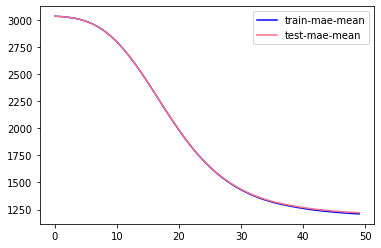

In [39]:
plt.figure()
plt.plot(bst_cv1['train-mae-mean'],color = 'blue',label="train-mae-mean")
plt.plot(bst_cv1['test-mae-mean'],label="test-mae-mean")
plt.legend()
#here the train or test are the kfold's train and test

there's no overfitting

### how about changing the num_boost_round?

In [40]:
%%time


        

bst_cv2 = xgb.cv(xgb_params, dtrain, num_boost_round=100, nfold=3, seed=0, 
                feval=xg_eval_mae, early_stopping_rounds=10)
#- num_boost_round： 一个整数，表示boosting 迭代数量   i.e. 树的个数
print ('CV score:', bst_cv1.iloc[-1,:]['test-mae-mean'])

CV score: 1220.054769
CPU times: user 7min 40s, sys: 1.68 s, total: 7min 41s
Wall time: 1min 1s


Text(0.5, 0, 'number of rounds')

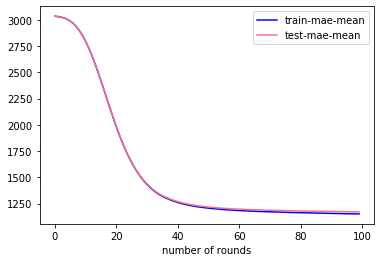

In [41]:
plt.figure()
plt.plot(bst_cv2['train-mae-mean'],color = 'blue',label="train-mae-mean")
plt.plot(bst_cv2['test-mae-mean'],label="test-mae-mean")
plt.legend()
plt.xlabel('number of rounds')
#here the train or test are the kfold's train and test

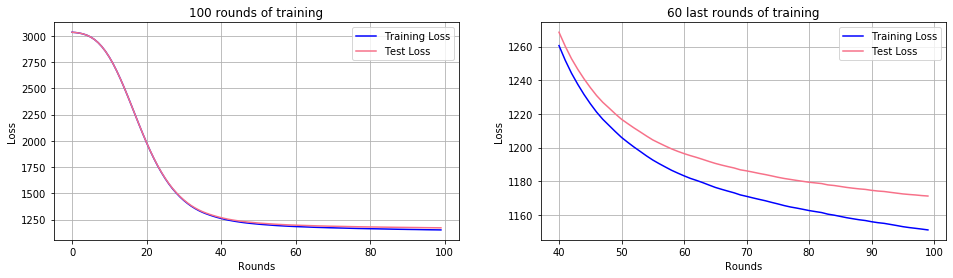

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,4)

ax1.set_title('100 rounds of training')
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.plot(bst_cv2['train-mae-mean'],color = 'blue')
ax1.plot(bst_cv2['test-mae-mean'])
ax1.legend(['Training Loss', 'Test Loss'])

ax2.set_title('60 last rounds of training')
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Loss')
ax2.grid(True)
ax2.plot(bst_cv2.iloc[40:]['train-mae-mean'],color = 'blue')
ax2.plot(bst_cv2.iloc[40:]['test-mae-mean'])
ax2.legend(['Training Loss', 'Test Loss'])

a little bit overfitting, but not very large  

## how to prune hyperparameter

这些参数里，有些是控制模型的复杂程度的，有些是控制采样策略的，有些又是控制学习率的。  
我们可以按照这样的功能类别进行调整

### General Approach for Parameter Tuning

1. Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the **optimum number of trees for this learning rate**. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.(like what we did before) 
  
  
2. **Tune tree-specific parameters** ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.  
  
  
3. **Tune regularization parameters** (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.  
  
  
4. **Lower the learning rate** and decide the optimal parameters.

### the process of pruning  
  
  
* Step 1: 选择一组初始参数


* Step 2: 改变 `max_depth` 和 `min_child_weight`.


* Step 3: 调节 `gamma` 降低模型过拟合风险.


* Step 4: 调节 `subsample` 和 `colsample_bytree` 改变数据采样策略.


* Step 5: 调节学习率 `eta`.

### set a Class 

about Class: https://zhuanlan.zhihu.com/p/30024792

make a Class for hyperparameter

- first fix some parameters

- def fit a model 
    - xgboost.train(params, dtrain, num_boost_round=10, evals=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, evals_result=None, verbose_eval=True,xgb_model=None, callbacks=None, learning_rates=None)
    
- def predict a model
    - predict(data, output_margin=False, ntree_limit=0)
    
- def kfold

- def make a feature importance plot
  
- def get parameters  
  
- def set parameters

关于 *args and kwargs* https://kodango.com/variable-arguments-in-python

In [132]:
class XGBoostRegressor():
    # __init__ double underscore
    def __init__(self, **kwargs):
        self.params = kwargs
        #kwargs represents as a dictionary 
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        self.params.update({'silent': 1, 'objective': 'reg:linear', 'seed':0})
    
    def fit(self, xtrain, ytrain):
        dtrain = xgb.DMatrix(xtrain,ytrain)
        self.model = xgb.train(params=self.params,dtrain=dtrain,
                              num_boost_round=self.num_boost_round,
                              feval=xg_eval_mae, maximize=False)
    
    def predict(self,x_pred):
        dpred = xgb.DMatrix(x_pred)
        return self.model.predict(dpred)
    
    def kfold(self, xtrain, ytrain, nfold=5):
        dtrain = xgb.DMatrix(xtrain,ytrain)
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, 
                           num_boost_round=self.num_boost_round,
                           nfold=nfold, seed=0, feval=xg_eval_mae,
                           maximize=False, early_stopping_rounds=10)
        return cv_rounds.iloc[-1,:]
    
    def plot_feature_importance(self,max_num_features=5):
        fig, ax1 = plt.subplots(figsize=(16,25))
        xgb.plot_importance(self.model, height=0.2,ax=ax1, xlim=None, ylim=None,
       title='Feature importance', xlabel='F score', ylabel='Features',
       importance_type='weight', max_num_features=max_num_features, grid=True, 
       show_values=True)
        
    def get_params(self,deep=False):
        return self.params
    
    def set_params(self, **params):
        self.params.update(params)
        return self


make a scorer for gridsearch

In [113]:
def mae_score(y_true, y_pred):
    return mean_absolute_error(np.exp(y_true), np.exp(y_pred))

mae_scorer = make_scorer(mae_score, greater_is_better=False)

## begin to prune hyperparameters

### Step1: make a basic model 

In [126]:
bst = XGBoostRegressor(eta=0.1, colsample_bytree=0.5, 
                       subsample=0.5, max_depth=5, min_child_weight=3, num_boost_round=50)

In [127]:
bst.kfold(train_x, train_y, nfold=5)

train-mae-mean     1209.757422
train-mae-std         2.306814
train-rmse-mean       0.558850
train-rmse-std        0.000475
test-mae-mean      1218.528027
test-mae-std         10.423910
test-rmse-mean        0.562571
test-rmse-std         0.002915
Name: 49, dtype: float64

In [128]:
bst.fit(train_x, train_y)

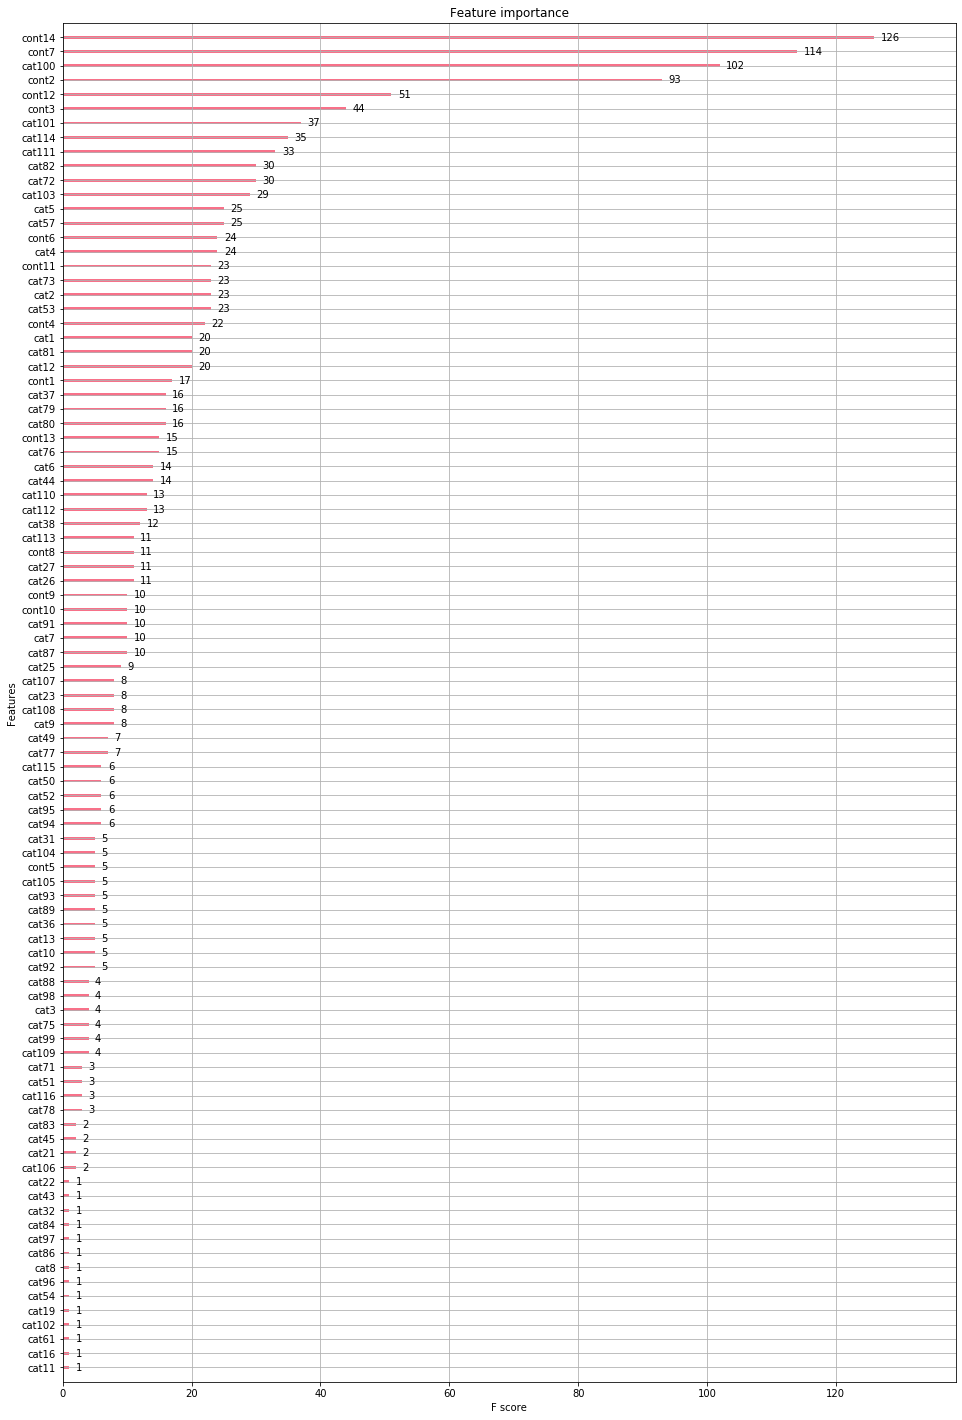

In [129]:
bst.plot_feature_importance(max_num_features=None)

### Step2: the depth and weight (树的complexity)

这些参数对xgboost性能影响最大，因此，他们应该调整第一。我们简要地概述它们：


* `max_depth`: 树的最大深度。增加这个值会使模型更加复杂，也容易出现过拟合，深度3-10是合理的。

* `min_child_weight`: 正则化参数. 如果树分区中的实例权重小于定义的总和，则停止树构建过程。

In [130]:
xgb_param_grid = {'max_depth': list(range(4,9)), 'min_child_weight': list((1,3,6))}
xgb_param_grid['max_depth']

[4, 5, 6, 7, 8]

⬆️ this will make 5*3=15 models, also we have to make cross validation, 15*5=75 models.  
so, that's why we choose one or two parameters to improve model

use GridSearchCV to find the best parameter.

In [136]:
%%time
 
grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, colsample_bytree=0.5, subsample=0.5),
                param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)


CPU times: user 1h 49min 14s, sys: 55 s, total: 1h 50min 9s
Wall time: 15min 21s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a32815b50>,
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [140]:
print(grid.best_params_, grid.best_score_)
pd.DataFrame(grid.cv_results_)

{'max_depth': 8, 'min_child_weight': 6} -1187.160085300011


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.636365,0.562088,0.155774,0.014609,4,1,"{'max_depth': 4, 'min_child_weight': 1}",-1237.884545,-1240.804830,-1251.368035,-1249.079052,-1236.250056,-1243.077304,6.058009,15
1,9.746421,0.201740,0.151081,0.013083,4,3,"{'max_depth': 4, 'min_child_weight': 3}",-1237.791200,-1239.901708,-1251.736521,-1248.662577,-1236.775764,-1242.973554,6.063996,14
2,9.930894,0.373319,0.152067,0.015122,4,6,"{'max_depth': 4, 'min_child_weight': 6}",-1237.694899,-1239.282107,-1250.147571,-1248.948130,-1235.846766,-1242.383894,5.961639,13
3,11.102867,0.516213,0.156922,0.010954,5,1,"{'max_depth': 5, 'min_child_weight': 1}",-1213.209845,-1214.172782,-1226.945496,-1224.341617,-1212.042948,-1218.142537,6.216367,10
4,9.926322,0.155706,0.144996,0.009593,5,3,"{'max_depth': 5, 'min_child_weight': 3}",-1214.095602,-1214.692248,-1228.155586,-1225.796553,-1211.612818,-1218.870561,6.739650,11
5,10.133534,0.473191,0.144475,0.010000,5,6,"{'max_depth': 5, 'min_child_weight': 6}",-1214.008295,-1216.480010,-1227.083422,-1225.329031,-1211.654567,-1218.911065,6.173842,12
6,11.974394,1.018668,0.156131,0.018632,6,1,"{'max_depth': 6, 'min_child_weight': 1}",-1198.690020,-1201.849046,-1212.188035,-1209.545611,-1196.025923,-1203.659727,6.222977,8
7,11.254578,0.077338,0.148561,0.012160,6,3,"{'max_depth': 6, 'min_child_weight': 3}",-1199.523990,-1201.044749,-1212.443144,-1210.312185,-1195.725372,-1203.809888,6.452709,9
8,11.029142,0.145841,0.144565,0.010553,6,6,"{'max_depth': 6, 'min_child_weight': 6}",-1198.120391,-1200.775799,-1212.382432,-1209.269906,-1195.795914,-1203.268888,6.444172,7
9,12.407486,0.156762,0.149013,0.010362,7,1,"{'max_depth': 7, 'min_child_weight': 1}",-1189.029835,-1191.564798,-1204.355112,-1200.381158,-1186.821508,-1194.430482,6.770295,6


look at the 'mean_test_score', in the gridsearch, we just need to focus on the absolute value, the smaller, the better

In [143]:
scores = grid.cv_results_['mean_test_score']
scores = scores.reshape(5,3)

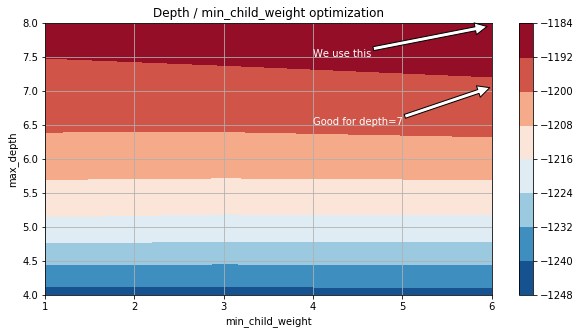

In [146]:
plt.figure(figsize=(10,5))
cp = plt.contourf(xgb_param_grid['min_child_weight'], xgb_param_grid['max_depth'], scores, cmap='RdBu_r')
plt.colorbar(cp)
plt.title('Depth / min_child_weight optimization')
plt.annotate('We use this', xy=(5.95, 7.95), xytext=(4, 7.5), arrowprops=dict(facecolor='white'), color='white')
plt.annotate('Good for depth=7', xy=(5.98, 7.05), 
             xytext=(4, 6.5), arrowprops=dict(facecolor='white'), color='white')
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.grid(True)
plt.show()

### Step 3: prune gamma to reduce the risk of overfitting

In [147]:
%%time

xgb_param_grid = {'gamma':[ 0.1 * i for i in range(0,5)]}

grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, max_depth=8, min_child_weight=6,
                                        colsample_bytree=0.5, subsample=0.5),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

CPU times: user 45min 52s, sys: 21.1 s, total: 46min 14s
Wall time: 6min 25s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a52f10310>,
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [150]:
grid.best_params_,grid.best_score_

({'gamma': 0.4}, -1186.7584172700506)

In [151]:
grid.cv_results_['mean_test_score']

array([-1187.1600853 , -1187.50057774, -1187.17451469, -1187.42136774,
       -1186.75841727])

Therefore, we choose gamma as 0.4

### Step 4: prune the *subsample* and *colsample_bytree* 

In [153]:
%%time

xgb_param_grid = {'subsample':[ 0.1 * i for i in range(6,9)],
                 'colsample_bytree':[ 0.1 * i for i in range(6,9)]}

grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, max_depth=8, min_child_weight=6,
                                        gamma = 0.4),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

CPU times: user 1h 41min 19s, sys: 47.5 s, total: 1h 42min 7s
Wall time: 14min 29s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a524324d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6000000000000001,
                                              0.7000000000000001, 0.8],
                         'subsample': [0.6000000000000001, 0.7000000000000001,
                                       0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [154]:
grid.best_params_,grid.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, -1183.940645807141)

### learning rate and number of rounds

树的个数小的情况下，树的权重要大的  
树的个数大的时候，树也权重就要小

如果树的个数小，权重也小，那么效果就表现的不是太好  
同理，树的个数多，权重大，效果也很差

一般来说，树多，学习率小是最好的
这样的过拟合风险也会低一些

https://sunjunee.github.io/2018/01/05/xgboost-tuning/  
eta [default=0.3] 每次迭代，学习率的衰减量。类似于GBM中的学习率？通常的取值在0.01-0.2之间。 Shrinkage（缩减），相当于学习速率（xgboost中的eta）。xgboost在进行完一次迭代后，会将叶子节点的权重乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间。实际应用中，一般把eta设置得小一点，然后迭代次数设置得大一点。（补充：传统GBDT的实现也有学习速率）

这个学习率和树的个数有互相影响，也要看看树的个数

⬆️其他的算法，像神经网络当中，也是适用这个的
（学习率低）

First, we plot different learning rates for a simpler model (50 trees):

In [155]:
%%time
    
xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=50, gamma=0.2, max_depth=8, min_child_weight=6,
                                        colsample_bytree=0.6, subsample=0.9),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

CPU times: user 1h 32min 2s, sys: 47.9 s, total: 1h 32min 49s
Wall time: 13min 32s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a524cf810>,
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04,
                                 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [156]:
grid.best_params_,grid.best_score_

({'eta': 0.2}, -1161.1110052221097)

In [160]:
grid.cv_results_

{'mean_fit_time': array([17.39498177, 18.65054569, 18.28763556, 16.6456203 , 16.48353601,
        17.70967116, 17.08522282, 17.22861619, 16.51648979]),
 'std_fit_time': array([1.10809404, 0.27582693, 0.91083705, 0.23453865, 0.10832421,
        1.25399294, 0.13128172, 0.2248232 , 0.18789825]),
 'mean_score_time': array([0.17345505, 0.1893014 , 0.18729692, 0.17741432, 0.16873431,
        0.17190342, 0.17690835, 0.17308145, 0.17158632]),
 'std_score_time': array([0.01924805, 0.02166878, 0.01933733, 0.01803981, 0.01448439,
        0.01217684, 0.0113963 , 0.01593712, 0.01580729]),
 'param_eta': masked_array(data=[0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04, 0.03],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'eta': 0.5},
  {'eta': 0.4},
  {'eta': 0.3},
  {'eta': 0.2},
  {'eta': 0.1},
  {'eta': 0.075},
  {'eta': 0.05},
  {'eta': 0.04},
  {'eta': 0.03}],
 'split0_test_sco

In [168]:
eta = grid.cv_results_['param_eta']
eta = np.array(eta)
eta = eta.astype(np.float64)
eta 

array([0.5  , 0.4  , 0.3  , 0.2  , 0.1  , 0.075, 0.05 , 0.04 , 0.03 ])

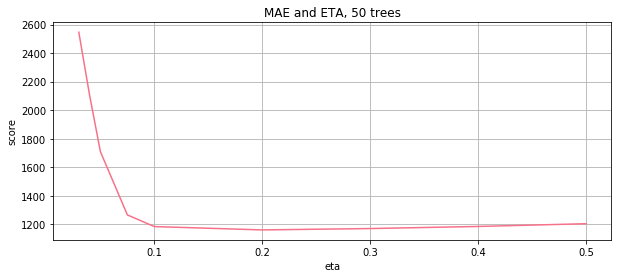

In [169]:
y = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 50 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

现在我们把树的个数增加到100

In [170]:
%%time 

xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6,
                                        colsample_bytree=0.6, subsample=0.9),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

CPU times: user 2h 59min 7s, sys: 55.7 s, total: 3h 2s
Wall time: 24min 50s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a5d284150>,
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04,
                                 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [171]:
grid.best_params_, grid.best_score_

({'eta': 0.1}, -1152.706107422628)

In [174]:
eta = grid.cv_results_['param_eta']
eta = np.array(eta)
eta = eta.astype(np.float64)
eta 

array([0.5  , 0.4  , 0.3  , 0.2  , 0.1  , 0.075, 0.05 , 0.04 , 0.03 ])

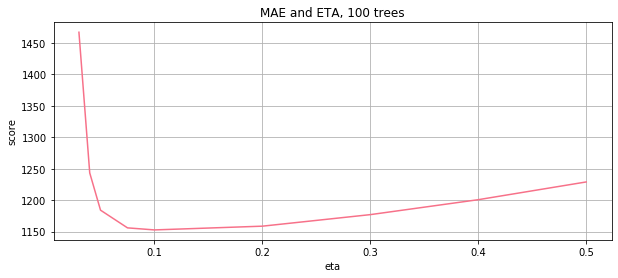

In [176]:
y = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

学习率低一些的效果更好

在增加树的个数呢？

In [177]:
%%time

xgb_param_grid = {'eta':[0.09,0.08,0.07,0.06,0.05,0.04]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=200, gamma=0.2, max_depth=8, min_child_weight=6,
                                        colsample_bytree=0.6, subsample=0.9),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

CPU times: user 4h 4min 24s, sys: 1min 35s, total: 4h 5min 59s
Wall time: 35min 45s


GridSearchCV(cv=5, error_score=nan,
             estimator=<__main__.XGBoostRegressor object at 0x1a5d1a94d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.09, 0.08, 0.07, 0.06, 0.05, 0.04]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)

In [178]:
grid.best_params_, grid.best_score_

({'eta': 0.07}, -1144.6194956982904)

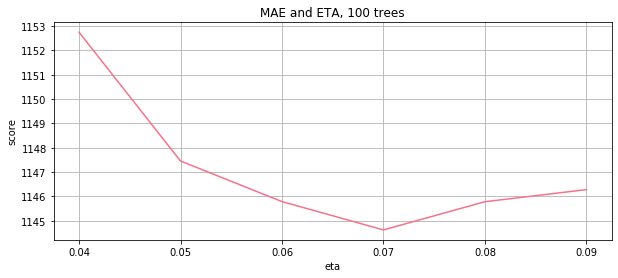

In [179]:
eta = grid.cv_results_['param_eta']
eta = np.array(eta)
eta = eta.astype(np.float64)
y = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [180]:
%%time

# Final XGBoost model


bst = XGBoostRegressor(num_boost_round=200, eta=0.07, gamma=0.2, max_depth=8, min_child_weight=6,
                                        colsample_bytree=0.6, subsample=0.9)
cv = bst.kfold(train_x, train_y, nfold=5)

CPU times: user 41min 52s, sys: 13.1 s, total: 42min 5s
Wall time: 5min 52s


In [181]:
cv

train-mae-mean     1041.731494
train-mae-std         2.447045
train-rmse-mean       0.496525
train-rmse-std        0.000701
test-mae-mean      1145.625244
test-mae-std          9.142858
test-rmse-mean        0.537586
test-rmse-std         0.002540
Name: 199, dtype: float64